### Data Cleaning and Preprocessing

In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# Load the dataset
weather_df = pd.read_csv('GlobalWeatherRepository.csv')

In [3]:
# Display the first few rows of the dataset
weather_df.head()

country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy  ...                1.1   
2                    73.4          Sunny  ...               10.4   
3                    43.3  Light drizzle  ...                0.7   
4                    78.8  Partly cloudy  ...              183.4   

   air_quality_PM10  air_quality_us-epa-index air_quality_gb-defra-index  \
0              26.6                         1                          1   
1               2.0                         1                          1   
2              18.4                         1                          1   
3               0.9                         1                          1   
4             262.3                         5                         10   

    sunrise    sunset  moonrise   moonset      moon_phase  moon_illumination  
0  04:50 AM  06:50 PM  12:12 PM  01:11 AM  Waxing Gibbous                 55  
1  05:21 AM  07:54 PM  12:58 PM  02:14 AM  Waxing Gibbous                 55  
2  05:40 AM  07:50 PM  01:15 PM  02:14 AM  Waxing Gibbous                 55  
3  06:31 AM  09:11 PM  02:12 PM  03:31 AM  Waxing Gibbous                 55  
4  06:12 AM  05:55 PM  01:17 PM  12:38 AM  Waxing Gibbous                 55  

[5 rows x 41 columns]

In [4]:
# View general info: column types, non-null counts
print("\nDataset Info:")
print(weather_df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82814 entries, 0 to 82813
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       82814 non-null  object 
 1   location_name                 82814 non-null  object 
 2   latitude                      82814 non-null  float64
 3   longitude                     82814 non-null  float64
 4   timezone                      82814 non-null  object 
 5   last_updated_epoch            82814 non-null  int64  
 6   last_updated                  82814 non-null  object 
 7   temperature_celsius           82814 non-null  float64
 8   temperature_fahrenheit        82814 non-null  float64
 9   condition_text                82814 non-null  object 
 10  wind_mph                      82814 non-null  float64
 11  wind_kph                      82814 non-null  float64
 12  wind_degree                   82814 non-null 

In [5]:
# Get descriptive stats for numerical columns
print("\nSummary Statistics:")
print(weather_df.describe())


Summary Statistics:


           latitude     longitude  last_updated_epoch  temperature_celsius  \
count  82814.000000  82814.000000        8.281400e+04         82814.000000   
mean      19.127301     22.178181        1.734294e+09            22.513393   
std       24.471765     65.831069        1.065771e+07             9.181872   
min      -41.300000   -175.200000        1.715849e+09           -24.900000   
25%        3.750000     -6.836100        1.725106e+09            17.300000   
50%       17.250000     23.316700        1.734346e+09            24.900000   
75%       40.400000     50.580000        1.743500e+09            28.400000   
max       64.150000    179.220000        1.752656e+09            49.200000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            82814.000000  82814.000000  82814.000000  82814.000000   
mean                72.525782      8.306001     13.370581    170.087823   
std                 16.527127      8.307480     13.367394    103.326527 

In [6]:
# Count missing values in each column
print("\nMissing Values per Column:")
print(weather_df.isnull().sum())


Missing Values per Column:
country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone   

In [7]:
# Convert 'last_updated' to datetime if not already
weather_df['last_updated'] = pd.to_datetime(weather_df['last_updated'], errors='coerce')

In [8]:
# Inspect the 'last_updated' column
print("\nlast_updated Column Details:")
print("Data Type:", weather_df['last_updated'].dtype)
print("Earliest Timestamp:", weather_df['last_updated'].min())
print("Latest Timestamp:", weather_df['last_updated'].max())
print("Unique Entries:", weather_df['last_updated'].nunique())


last_updated Column Details:
Data Type: datetime64[ns]
Earliest Timestamp: 2024-05-16 01:45:00
Latest Timestamp: 2025-07-16 21:45:00
Unique Entries: 13926


### Exploratory Data Analysis

In [9]:
# Select only numeric columns for analysis
weather_numeric = weather_df.select_dtypes(include=['float64', 'int64'])

In [10]:
# Display the first few rows of the new dataframe
weather_numeric.head()

latitude  longitude  last_updated_epoch  temperature_celsius  \
0     34.52      69.18          1715849100                 26.6   
1     41.33      19.82          1715849100                 19.0   
2     36.76       3.05          1715849100                 23.0   
3     42.50       1.52          1715849100                  6.3   
4     -8.84      13.23          1715849100                 26.0   

   temperature_fahrenheit  wind_mph  wind_kph  wind_degree  pressure_mb  \
0                    79.8       8.3      13.3          338       1012.0   
1                    66.2       6.9      11.2          320       1012.0   
2                    73.4       9.4      15.1          280       1011.0   
3                    43.3       7.4      11.9          215       1007.0   
4                    78.8       8.1      13.0          150       1011.0   

   pressure_in  ...  gust_kph  air_quality_Carbon_Monoxide  air_quality_Ozone  \
0        29.89  ...      15.3                        277.0              103.0   
1        29.88  ...      18.4                        193.6               97.3   
2        29.85  ...      22.3                        540.7               12.2   
3        29.75  ...      13.7                        170.2               64.4   
4        29.85  ...      20.2                       2964.0               19.0   

   air_quality_Nitrogen_dioxide  air_quality_Sulphur_dioxide  \
0                           1.1                          0.2   
1                           0.9                          0.1   
2                          65.1                         13.4   
3                           1.6                          0.2   
4                          72.7                         31.5   

   air_quality_PM2.5  air_quality_PM10  air_quality_us-epa-index  \
0                8.4              26.6                         1   
1                1.1               2.0                         1   
2               10.4              18.4                         1   
3                0.7               0.9                         1   
4              183.4             262.3                         5   

   air_quality_gb-defra-index  moon_illumination  
0                           1                 55  
1                           1                 55  
2                           1                 55  
3                           1                 55  
4                          10                 55  

[5 rows x 30 columns]

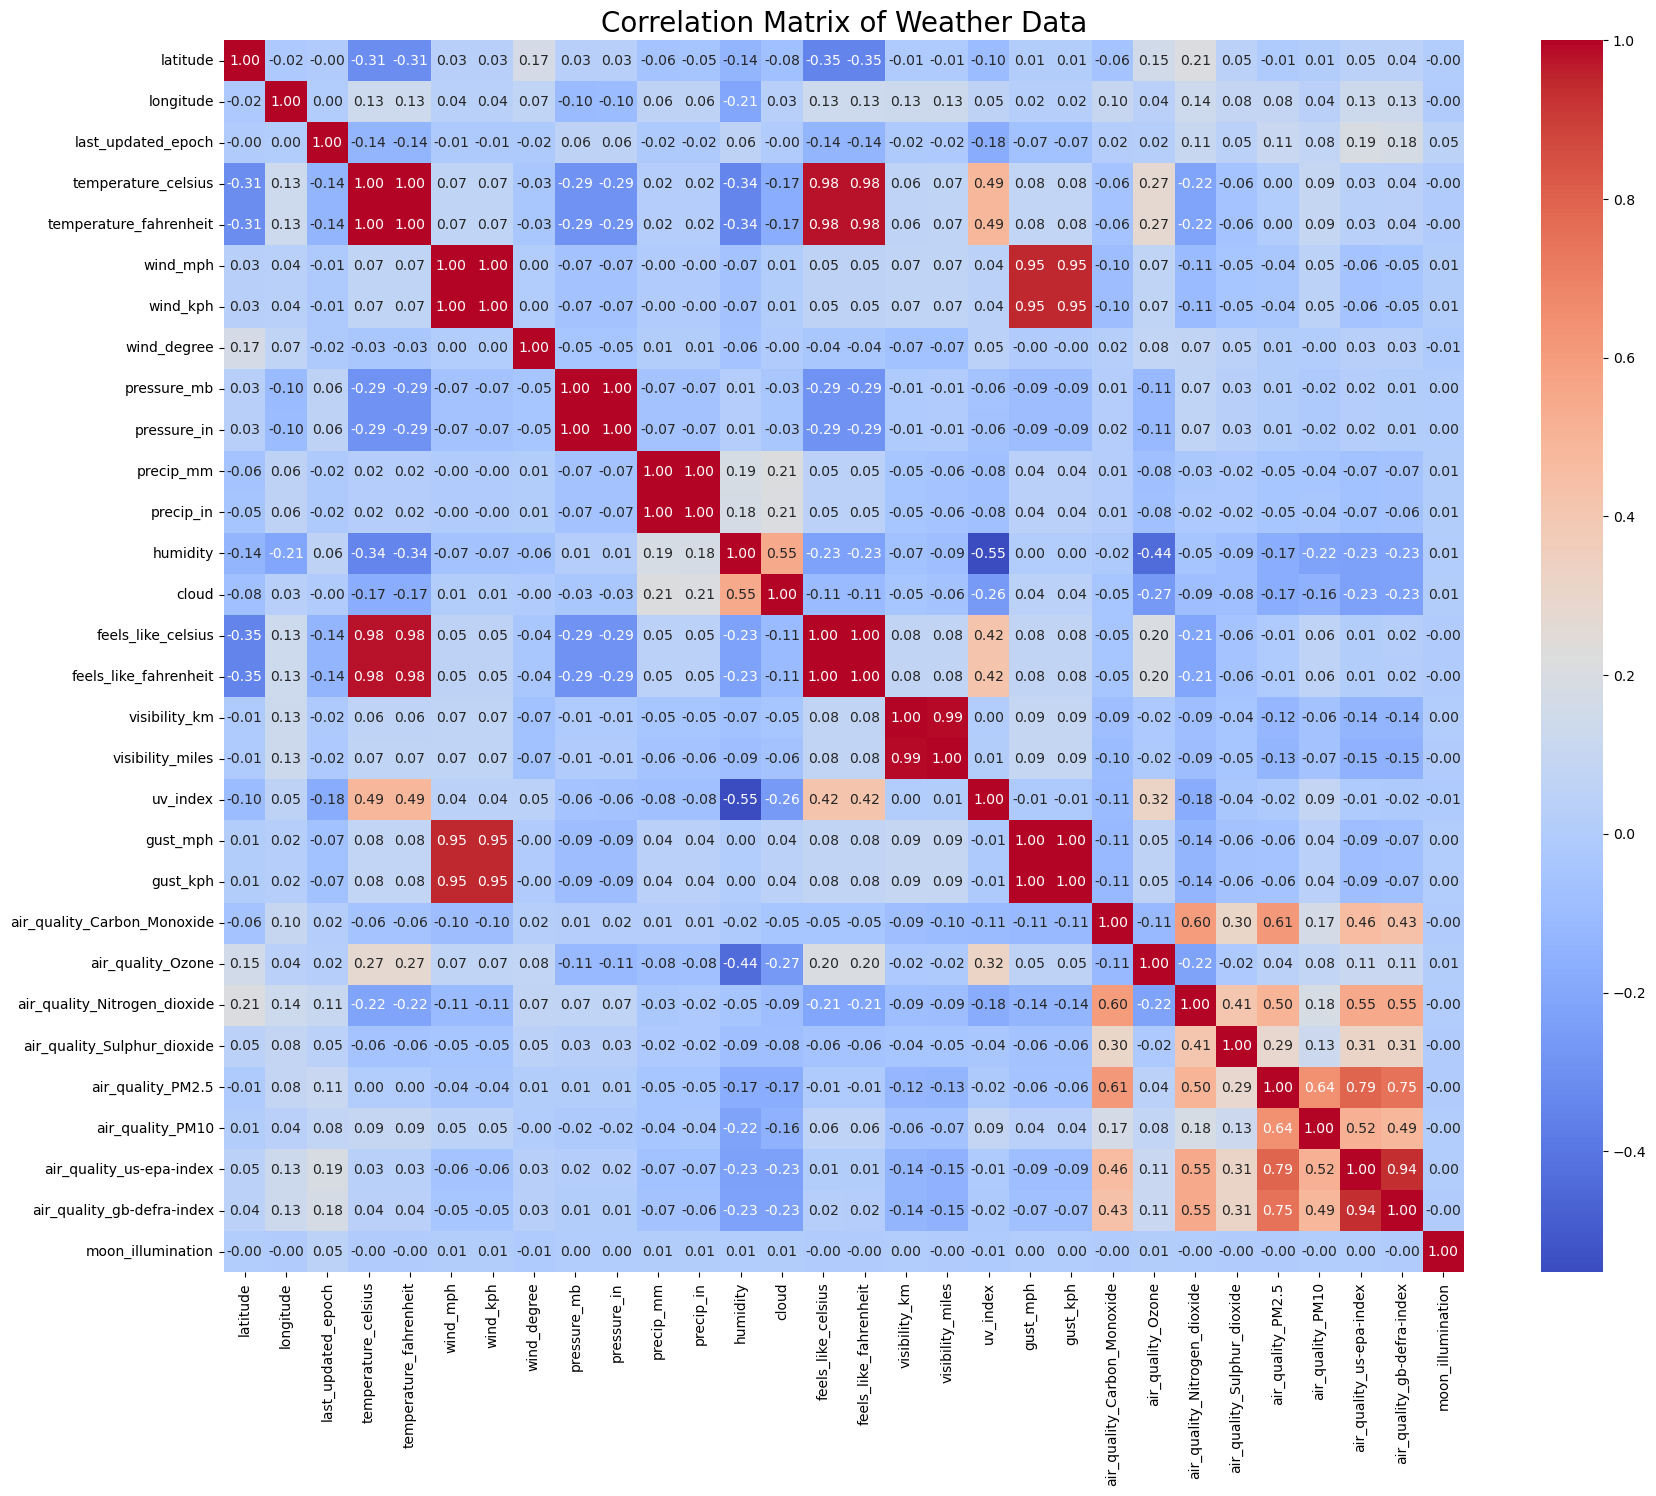

In [11]:
# Create a correlation matrix and heatmap for 
# determining relationships between numeric variables
correlation_matrix = weather_numeric.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Weather Data', fontsize=20)
plt.show()

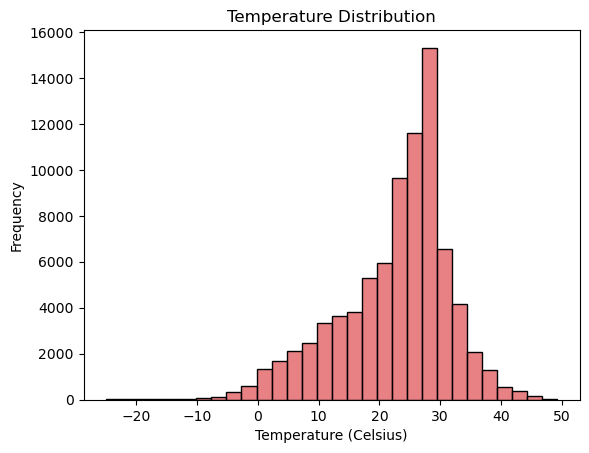

In [12]:
# Show the distribution of temperature values
sns.histplot(weather_df['temperature_celsius'], 
             bins=30, kde=False, color='#e15759')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Frequency')
plt.show()

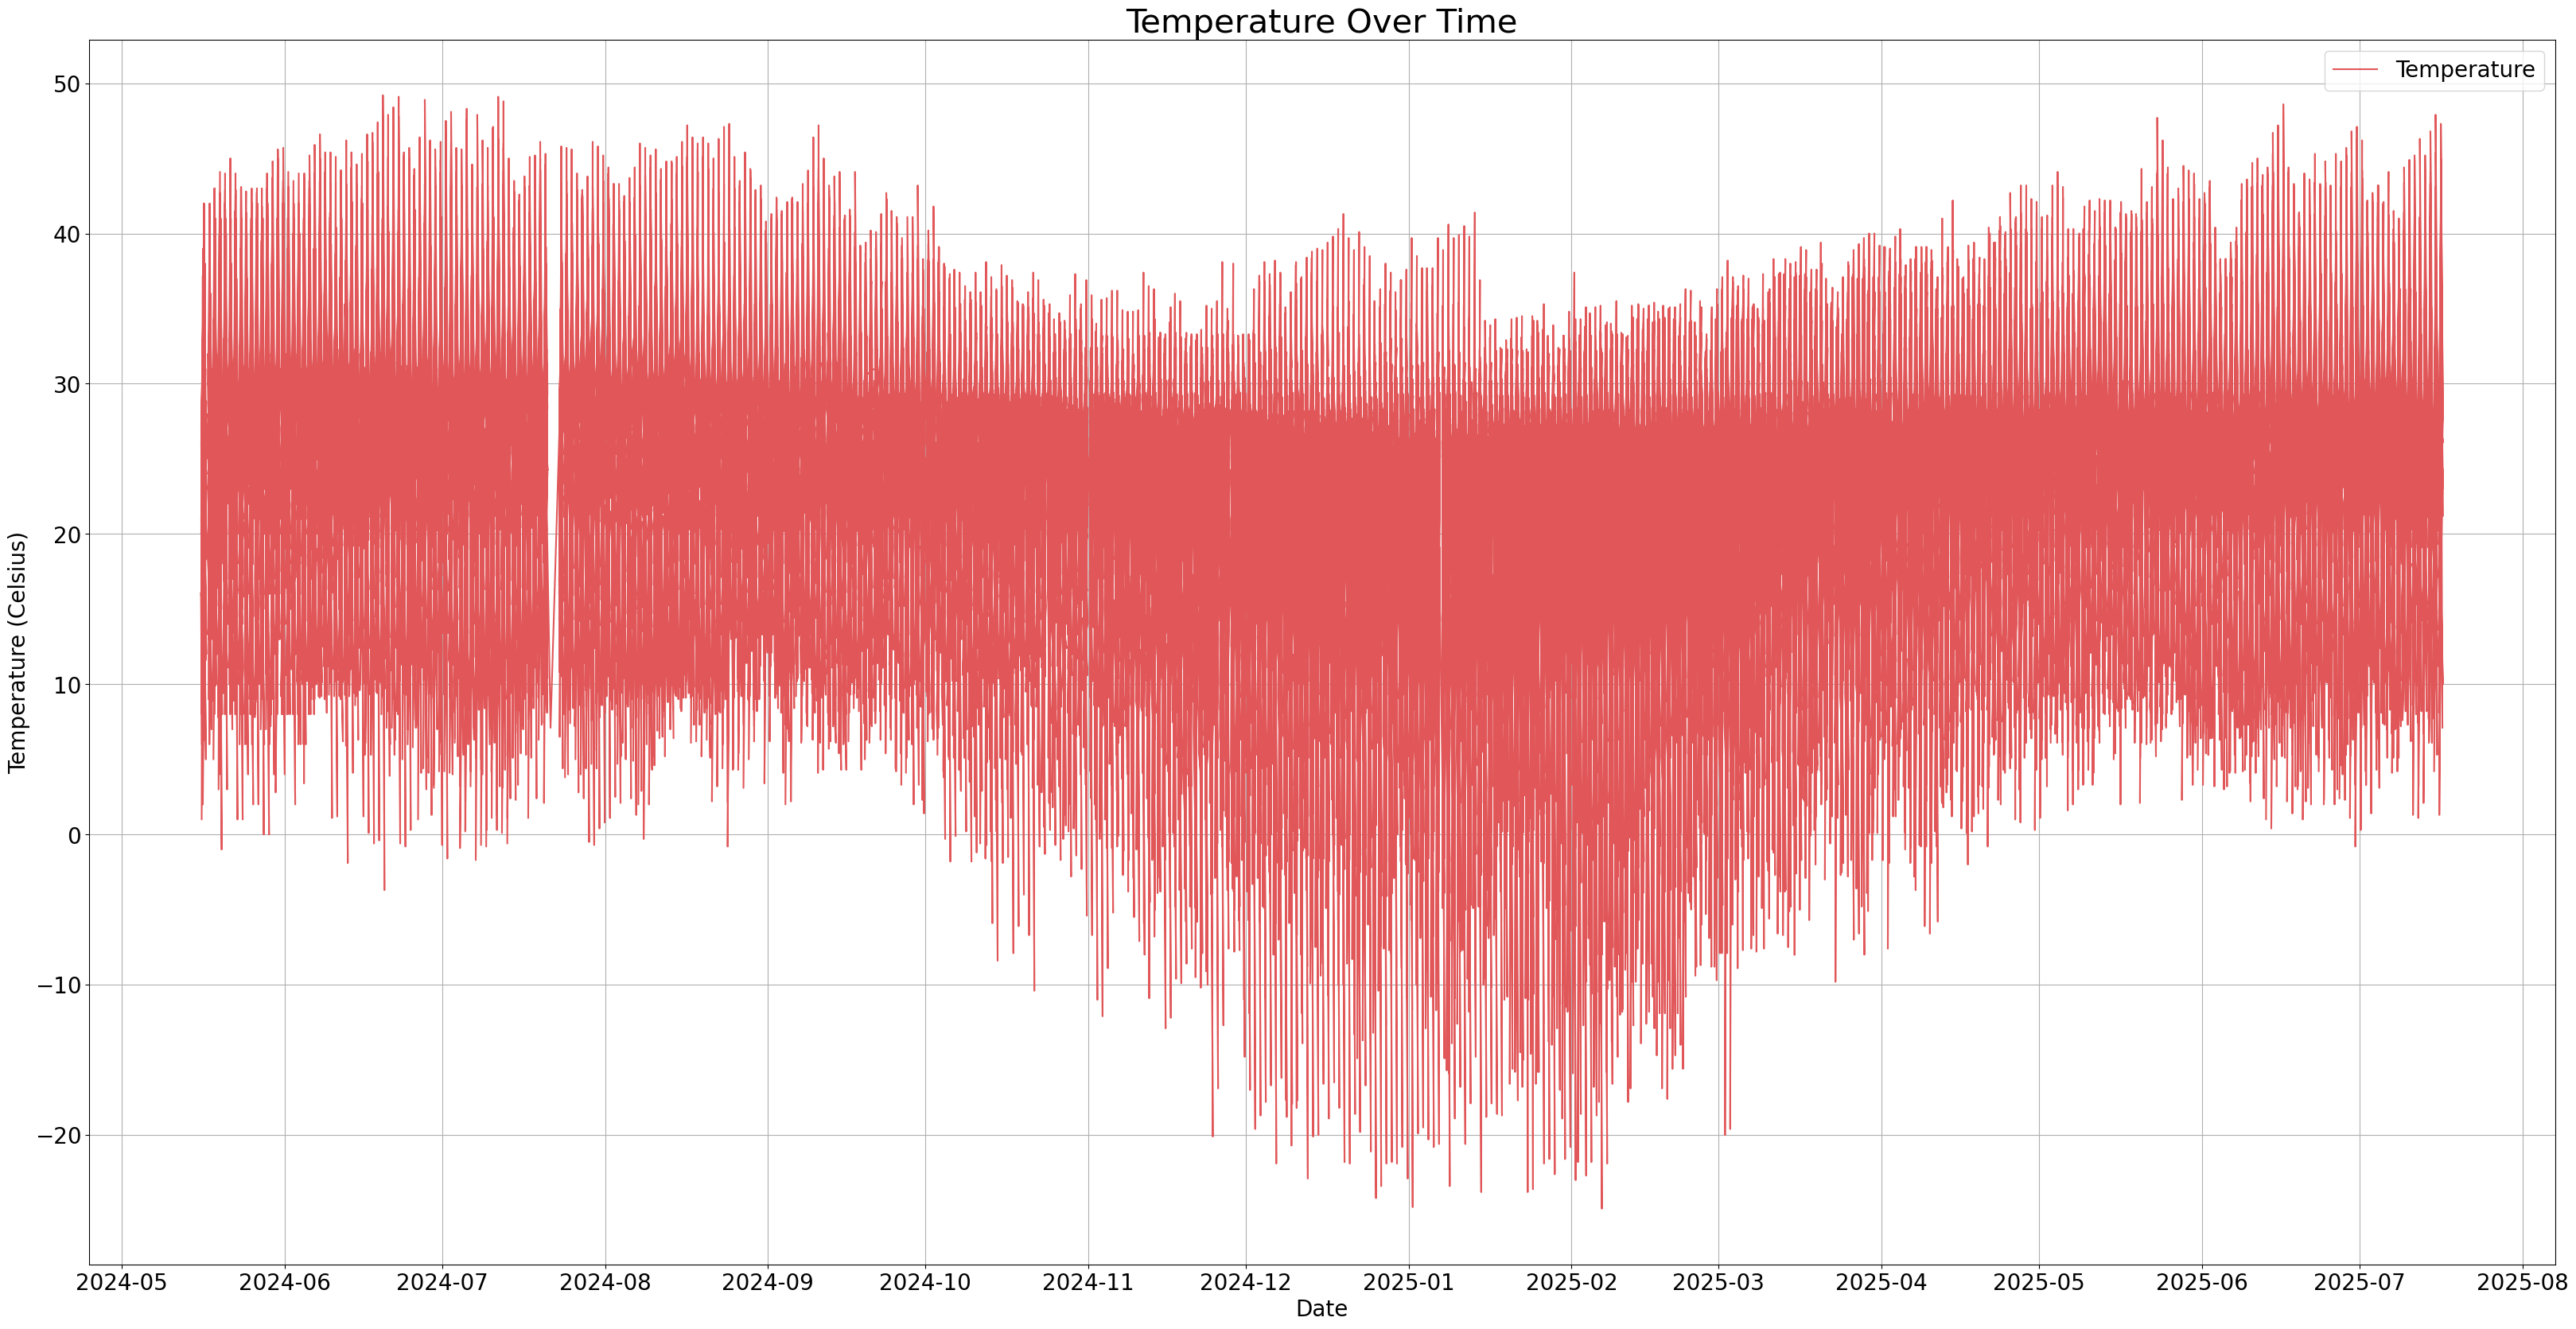

In [13]:
# Plot temperature over time
plt.figure(figsize=(40, 20))
plt.plot(weather_df['last_updated'], weather_df['temperature_celsius'], 
         label='Temperature', color='#e15759')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Temperature Over Time', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Temperature (Celsius)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

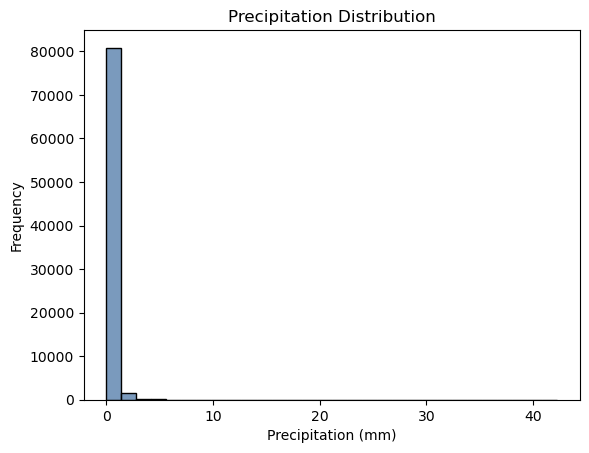

In [14]:
# Show the distribution of precipitation values
sns.histplot(weather_df['precip_mm'], 
             bins=30, kde=False, color='#4e79a7')
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

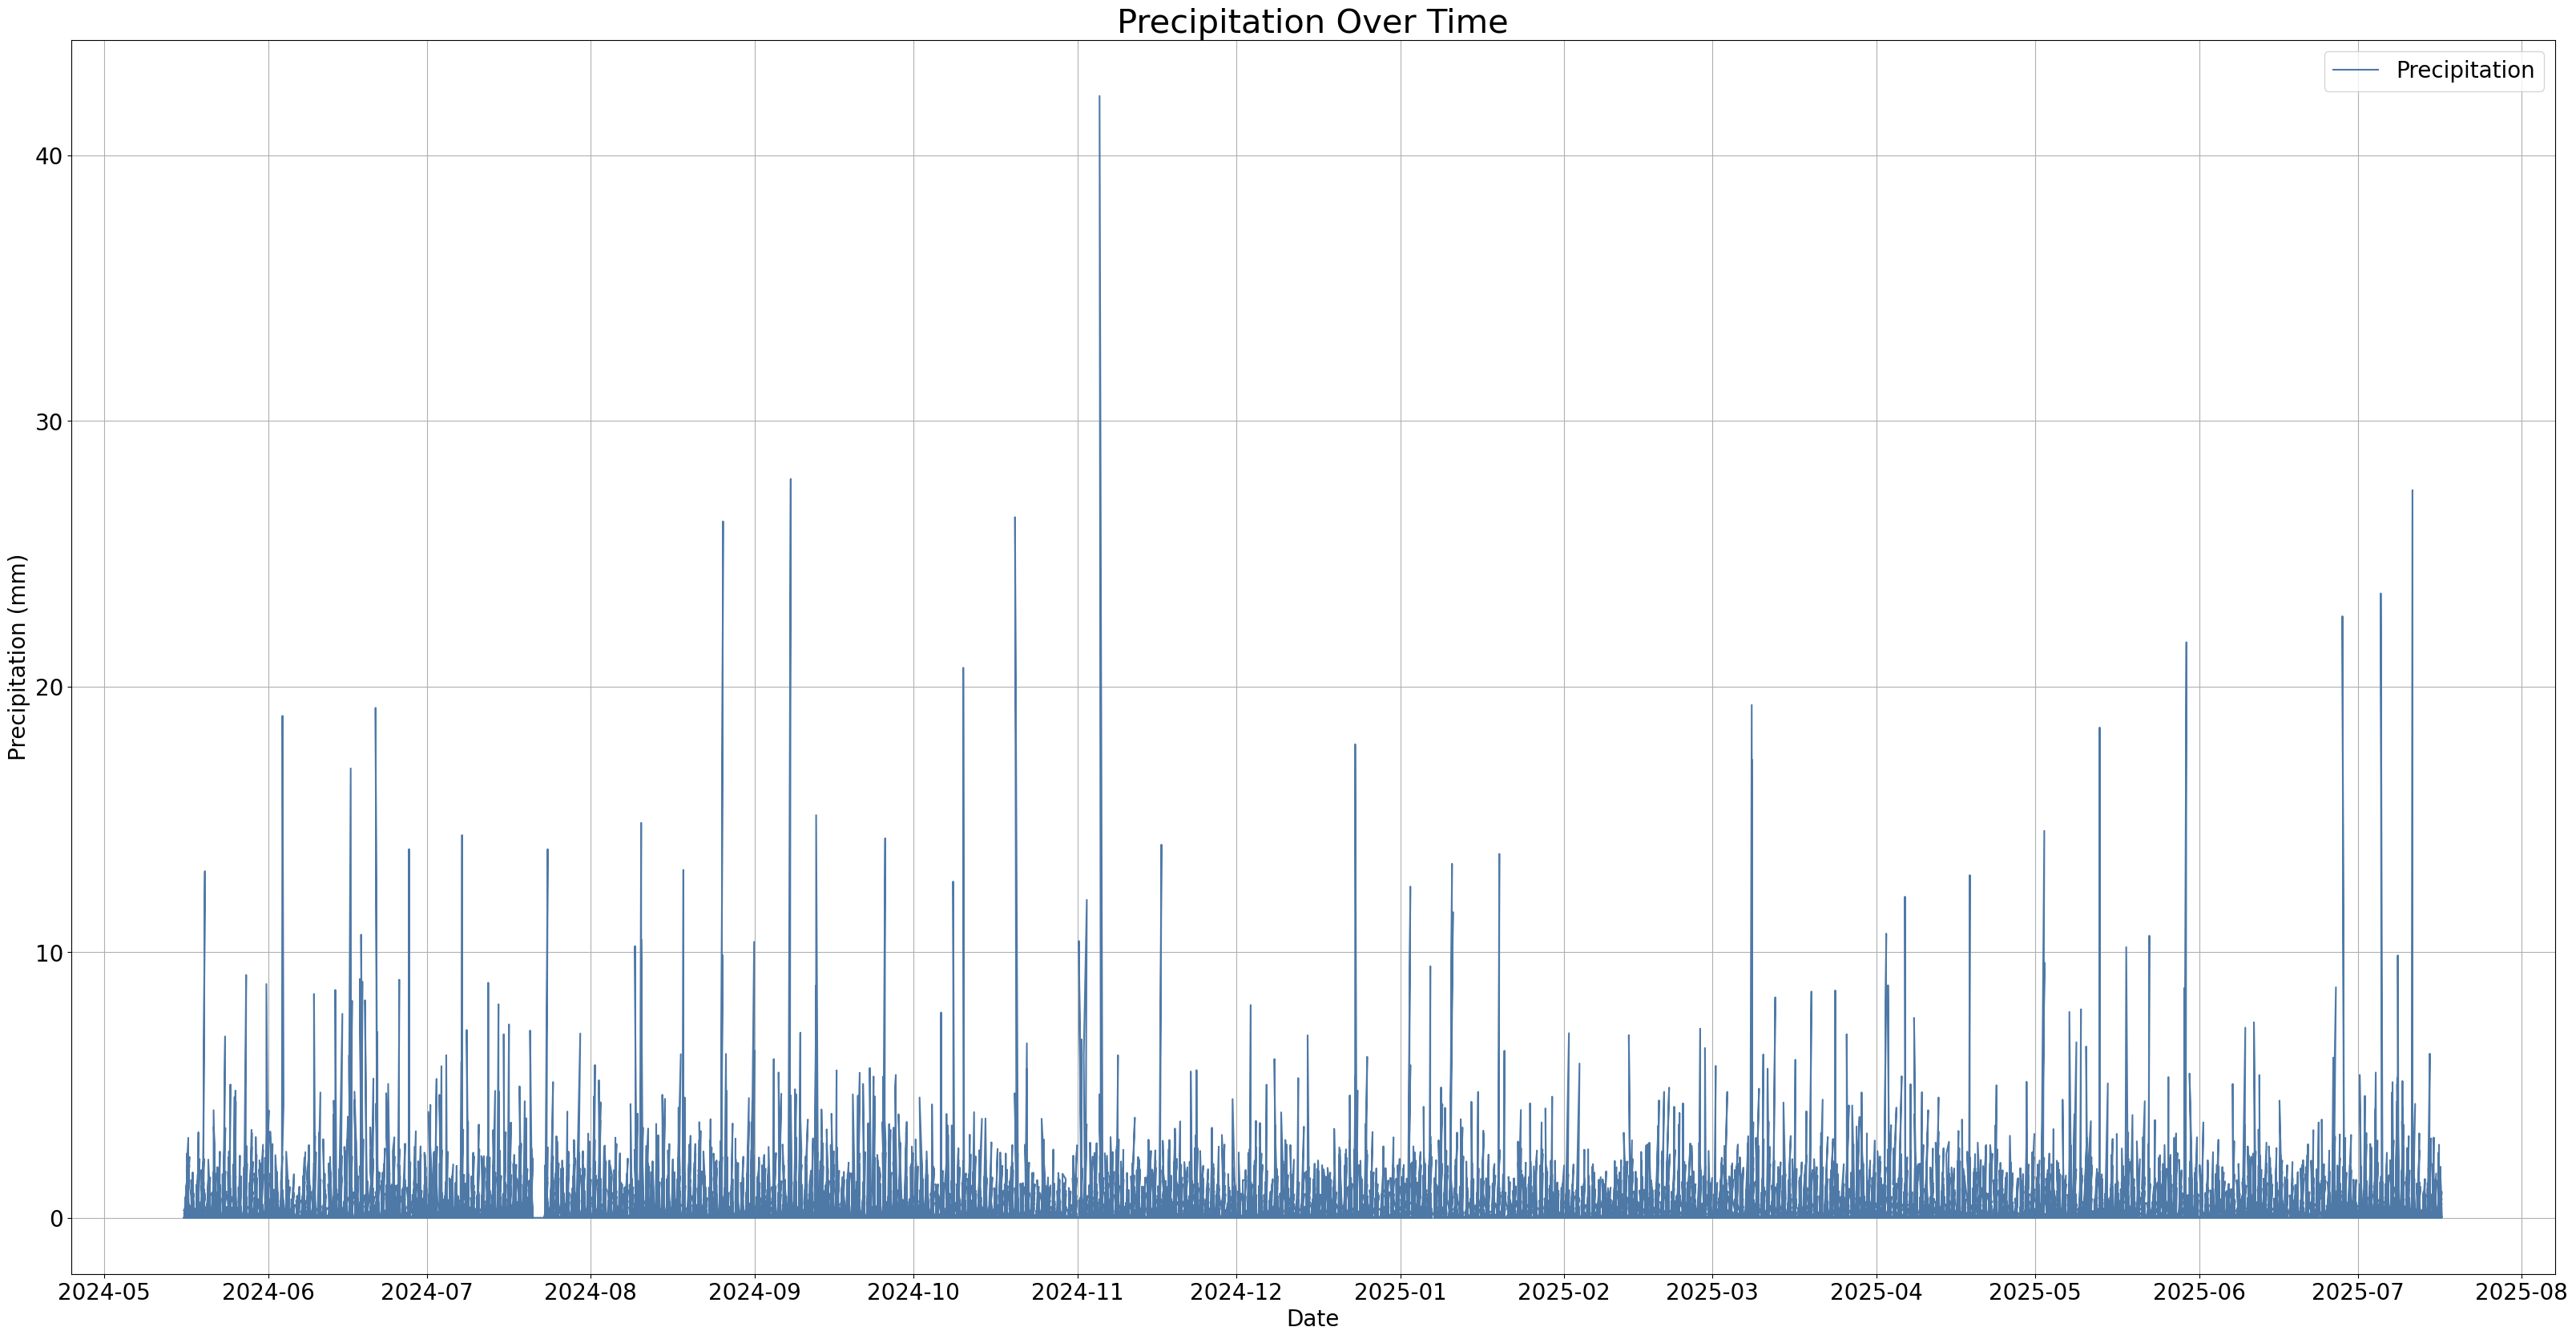

In [15]:
# Plot precipitation over time
plt.figure(figsize=(40, 20))
plt.plot(weather_df['last_updated'], weather_df['precip_mm'], 
         label='Precipitation', color='#4e79a7')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Precipitation Over Time', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Precipitation (mm)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

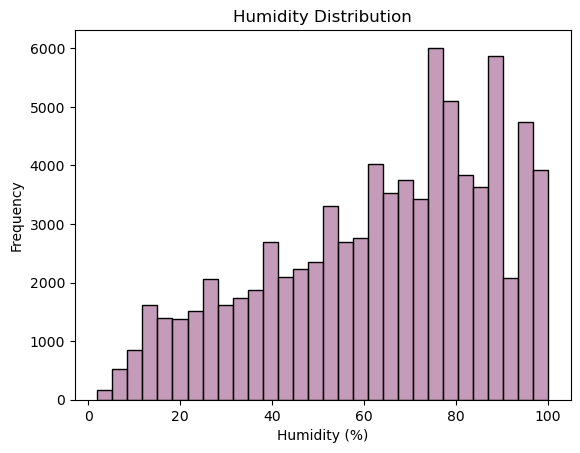

In [16]:
# Show the distribution of humidity values
sns.histplot(weather_df['humidity'], 
             bins=30, kde=False, color='#b07aa1')
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

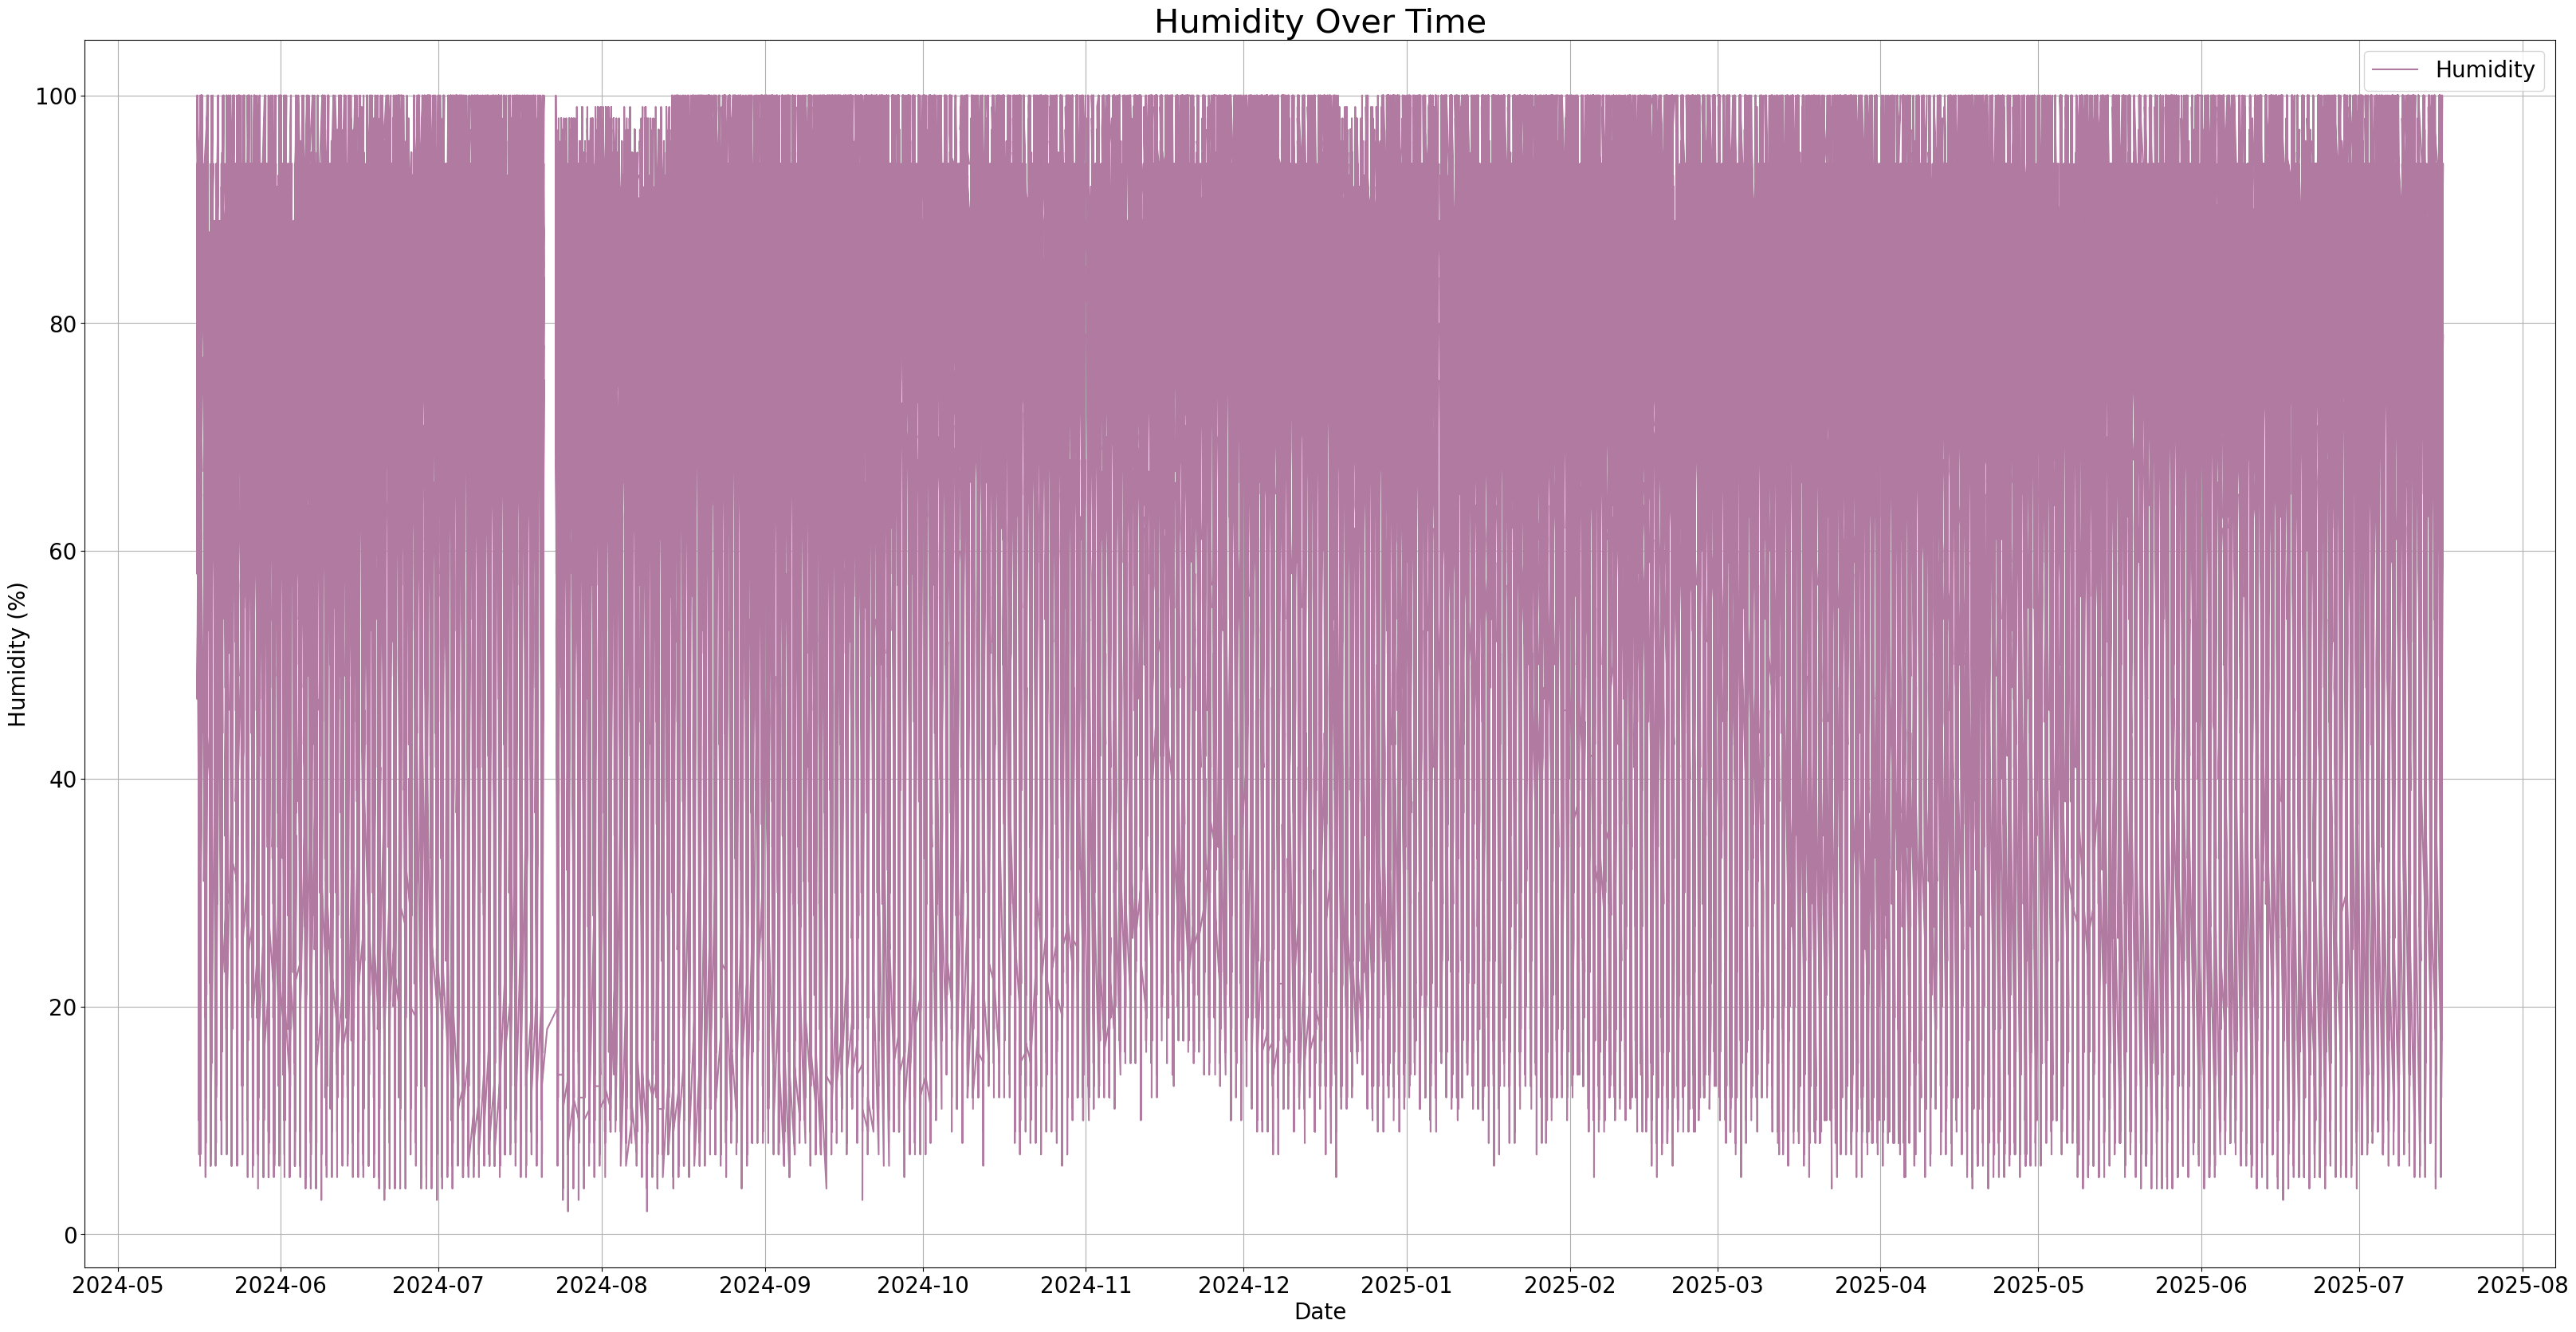

In [17]:
# Plot humidity over time
plt.figure(figsize=(40, 20))
plt.plot(weather_df['last_updated'], weather_df['humidity'], 
         label='Humidity', color='#b07aa1')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Humidity Over Time', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

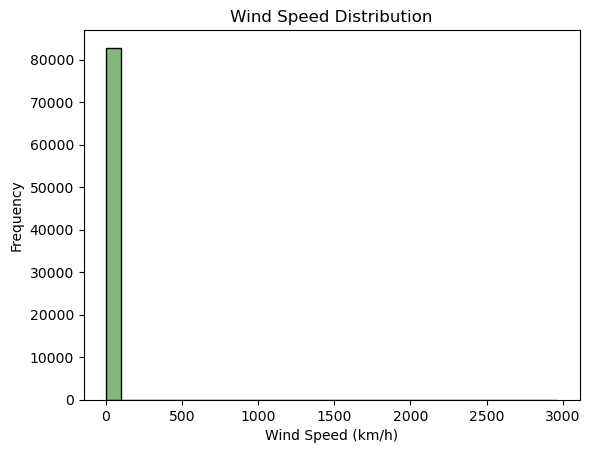

In [18]:
# Show the distribution of wind speed values
sns.histplot(weather_df['wind_kph'], 
             bins=30, kde=False, color='#59a14f')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')
plt.show()

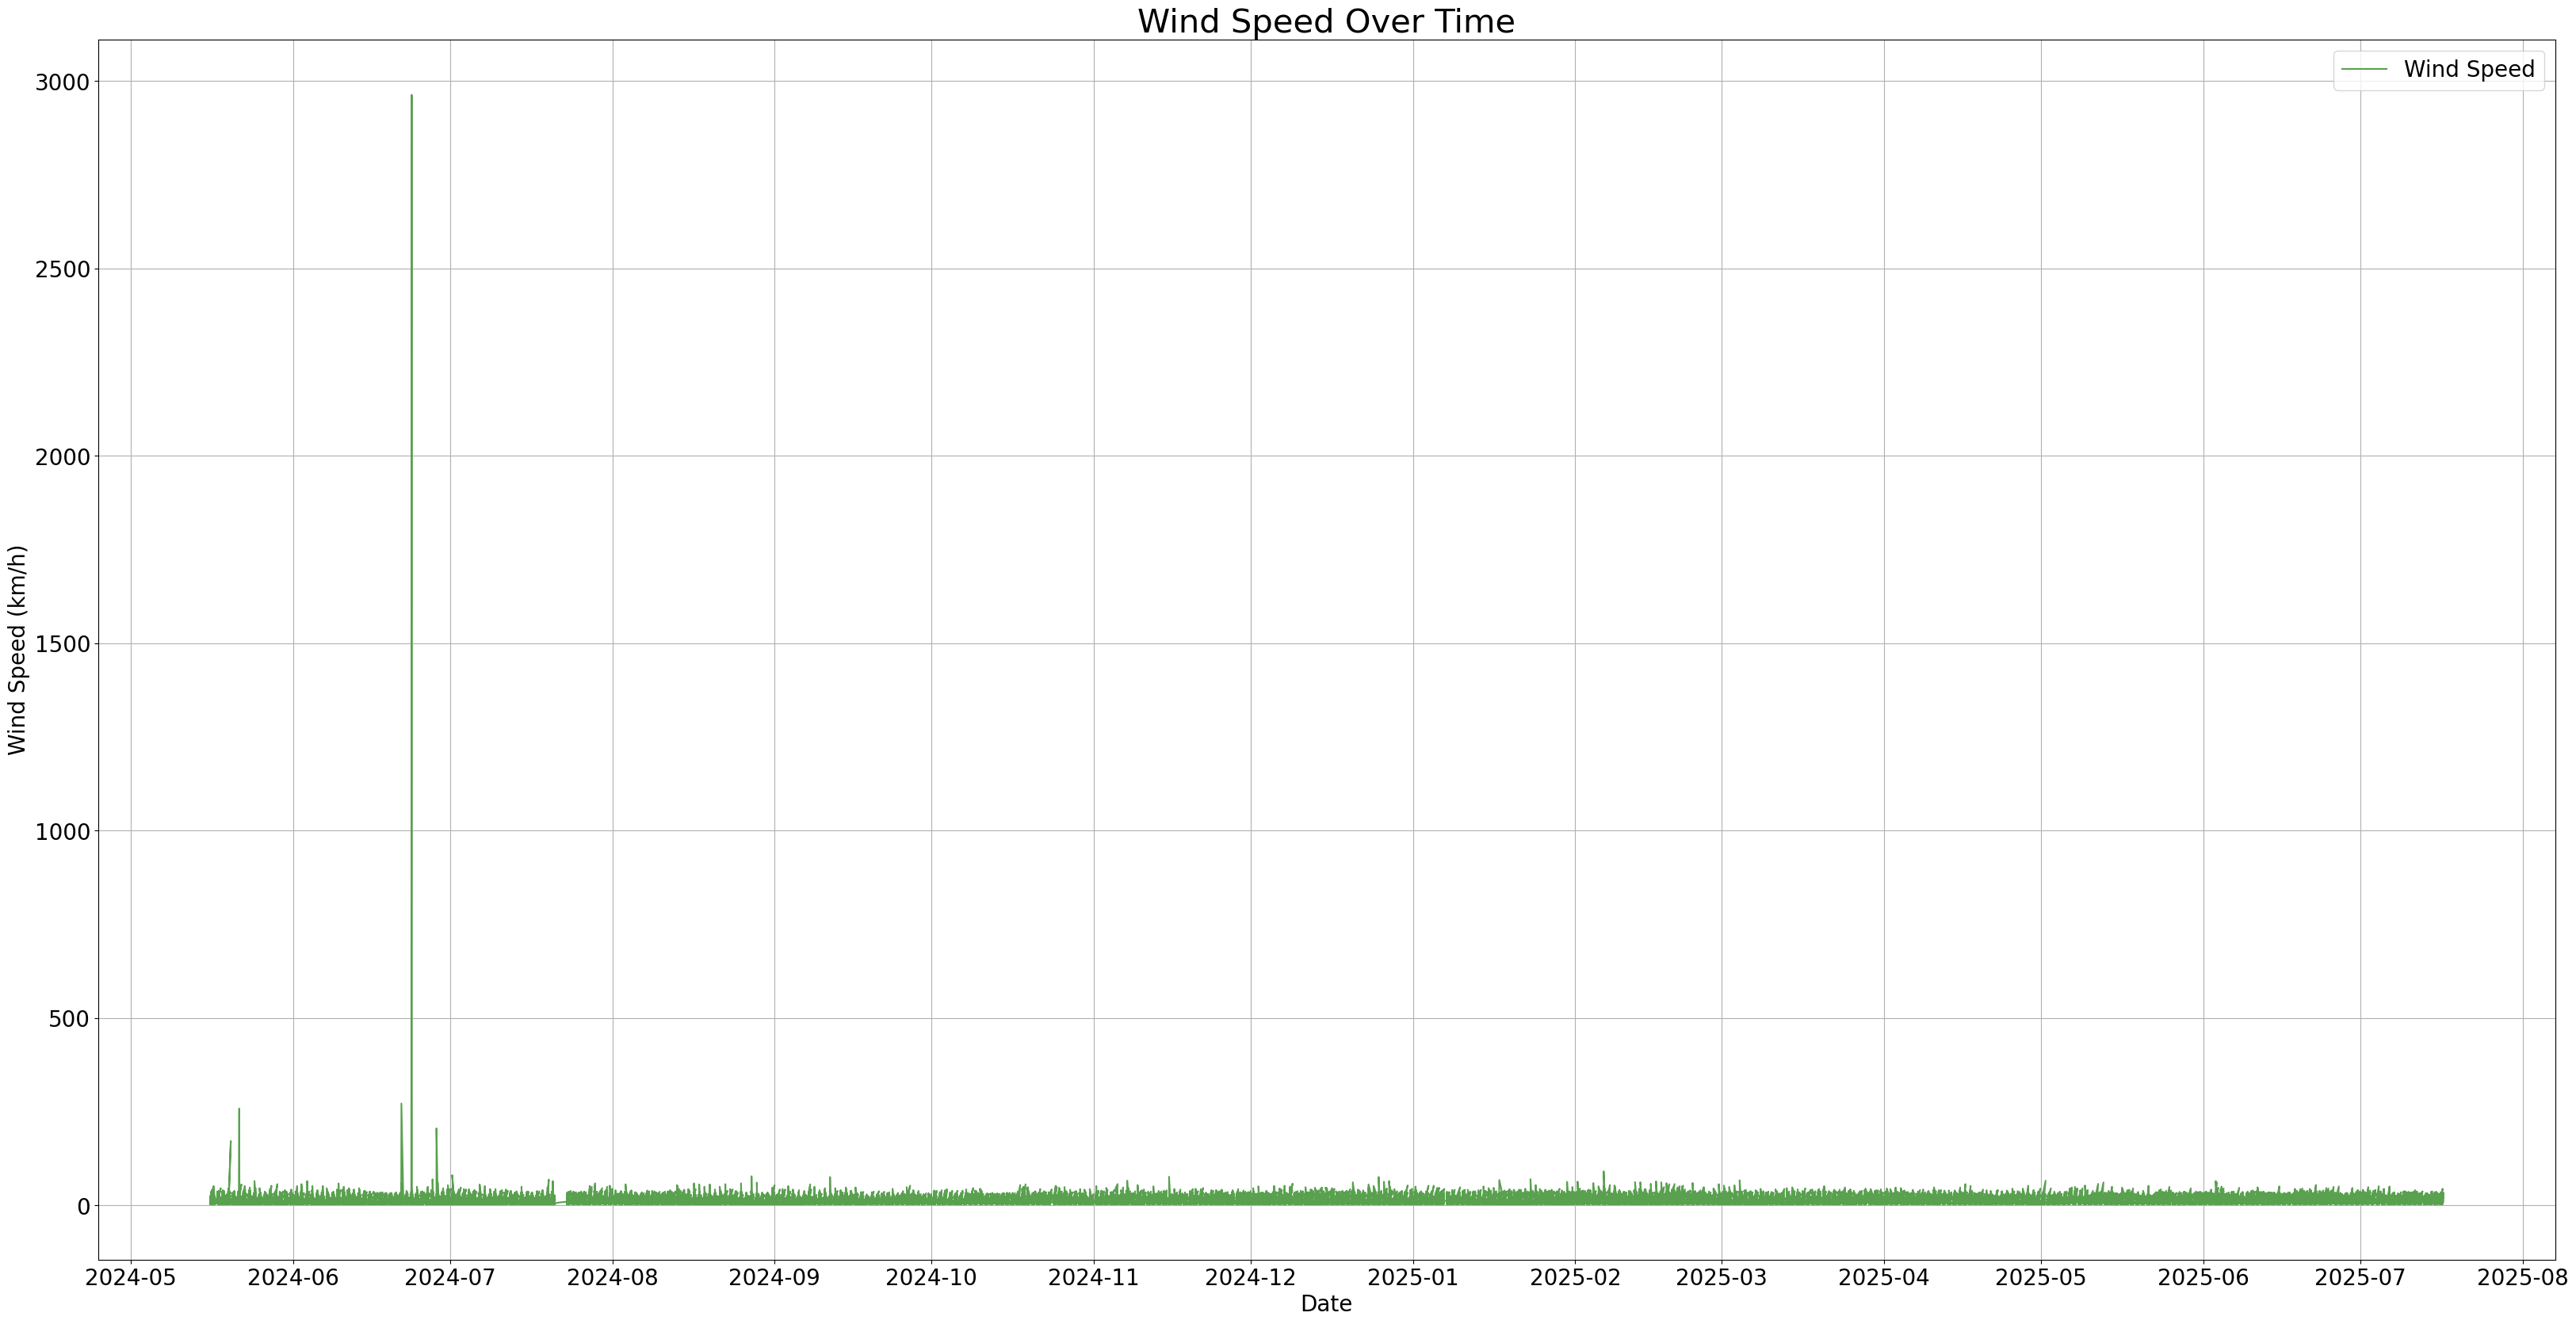

In [19]:
# Plot wind speed over time
plt.figure(figsize=(40, 20))
plt.plot(weather_df['last_updated'], weather_df['wind_kph'], 
         label='Wind Speed', color='#59a14f')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Wind Speed Over Time', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Wind Speed (km/h)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

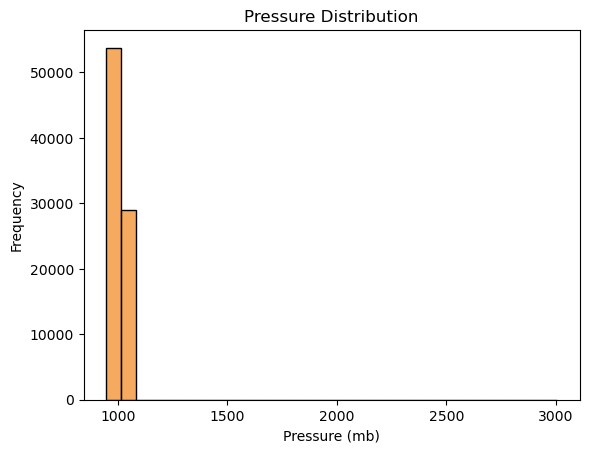

In [20]:
# Show the distribution of pressure values
sns.histplot(weather_df['pressure_mb'], 
             bins=30, kde=False, color='#f28e2b')
plt.title('Pressure Distribution')
plt.xlabel('Pressure (mb)')
plt.ylabel('Frequency')
plt.show()

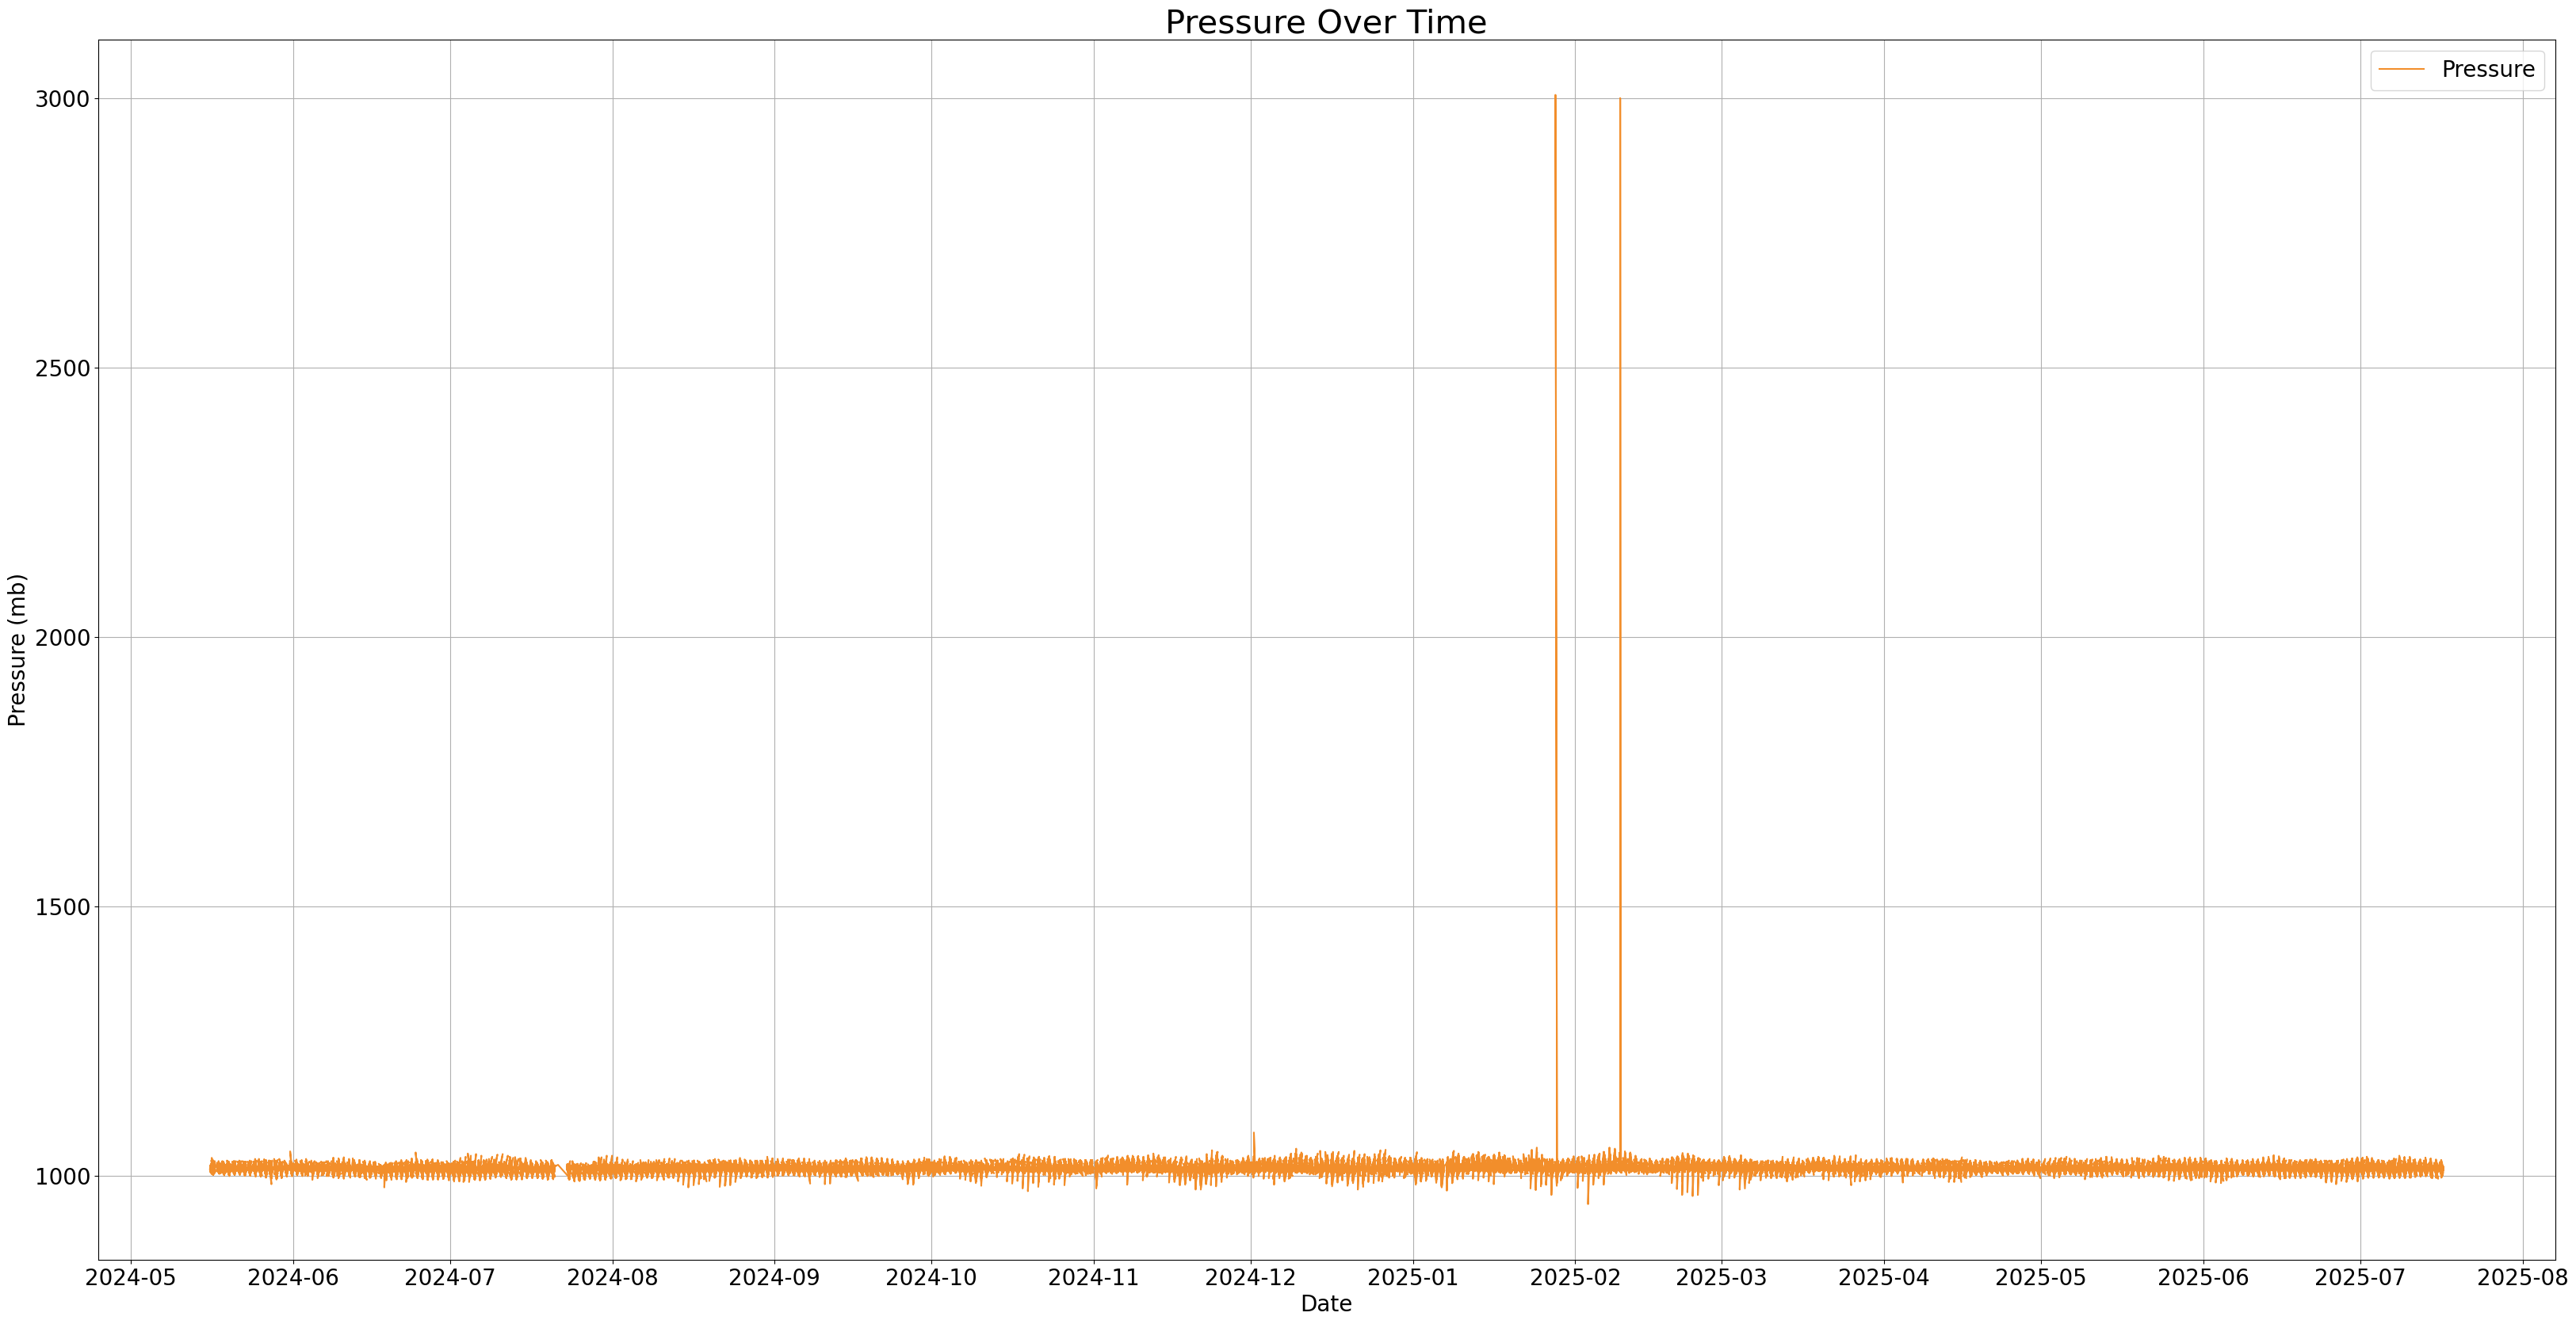

In [21]:
# Plot pressure over time
plt.figure(figsize=(40, 20))
plt.plot(weather_df['last_updated'], weather_df['pressure_mb'], 
         label='Pressure', color='#f28e2b')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Pressure Over Time', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Pressure (mb)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

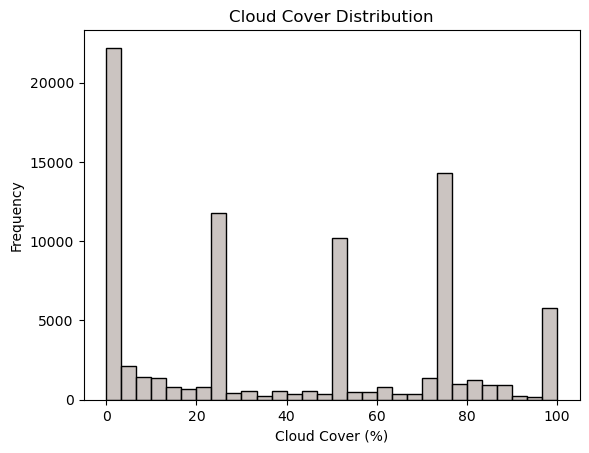

In [22]:
# Show the distrubution of cloud cover values
sns.histplot(weather_df['cloud'], 
             bins=30, kde=False, color='#bab0ac')
plt.title('Cloud Cover Distribution')
plt.xlabel('Cloud Cover (%)')
plt.ylabel('Frequency')
plt.show()

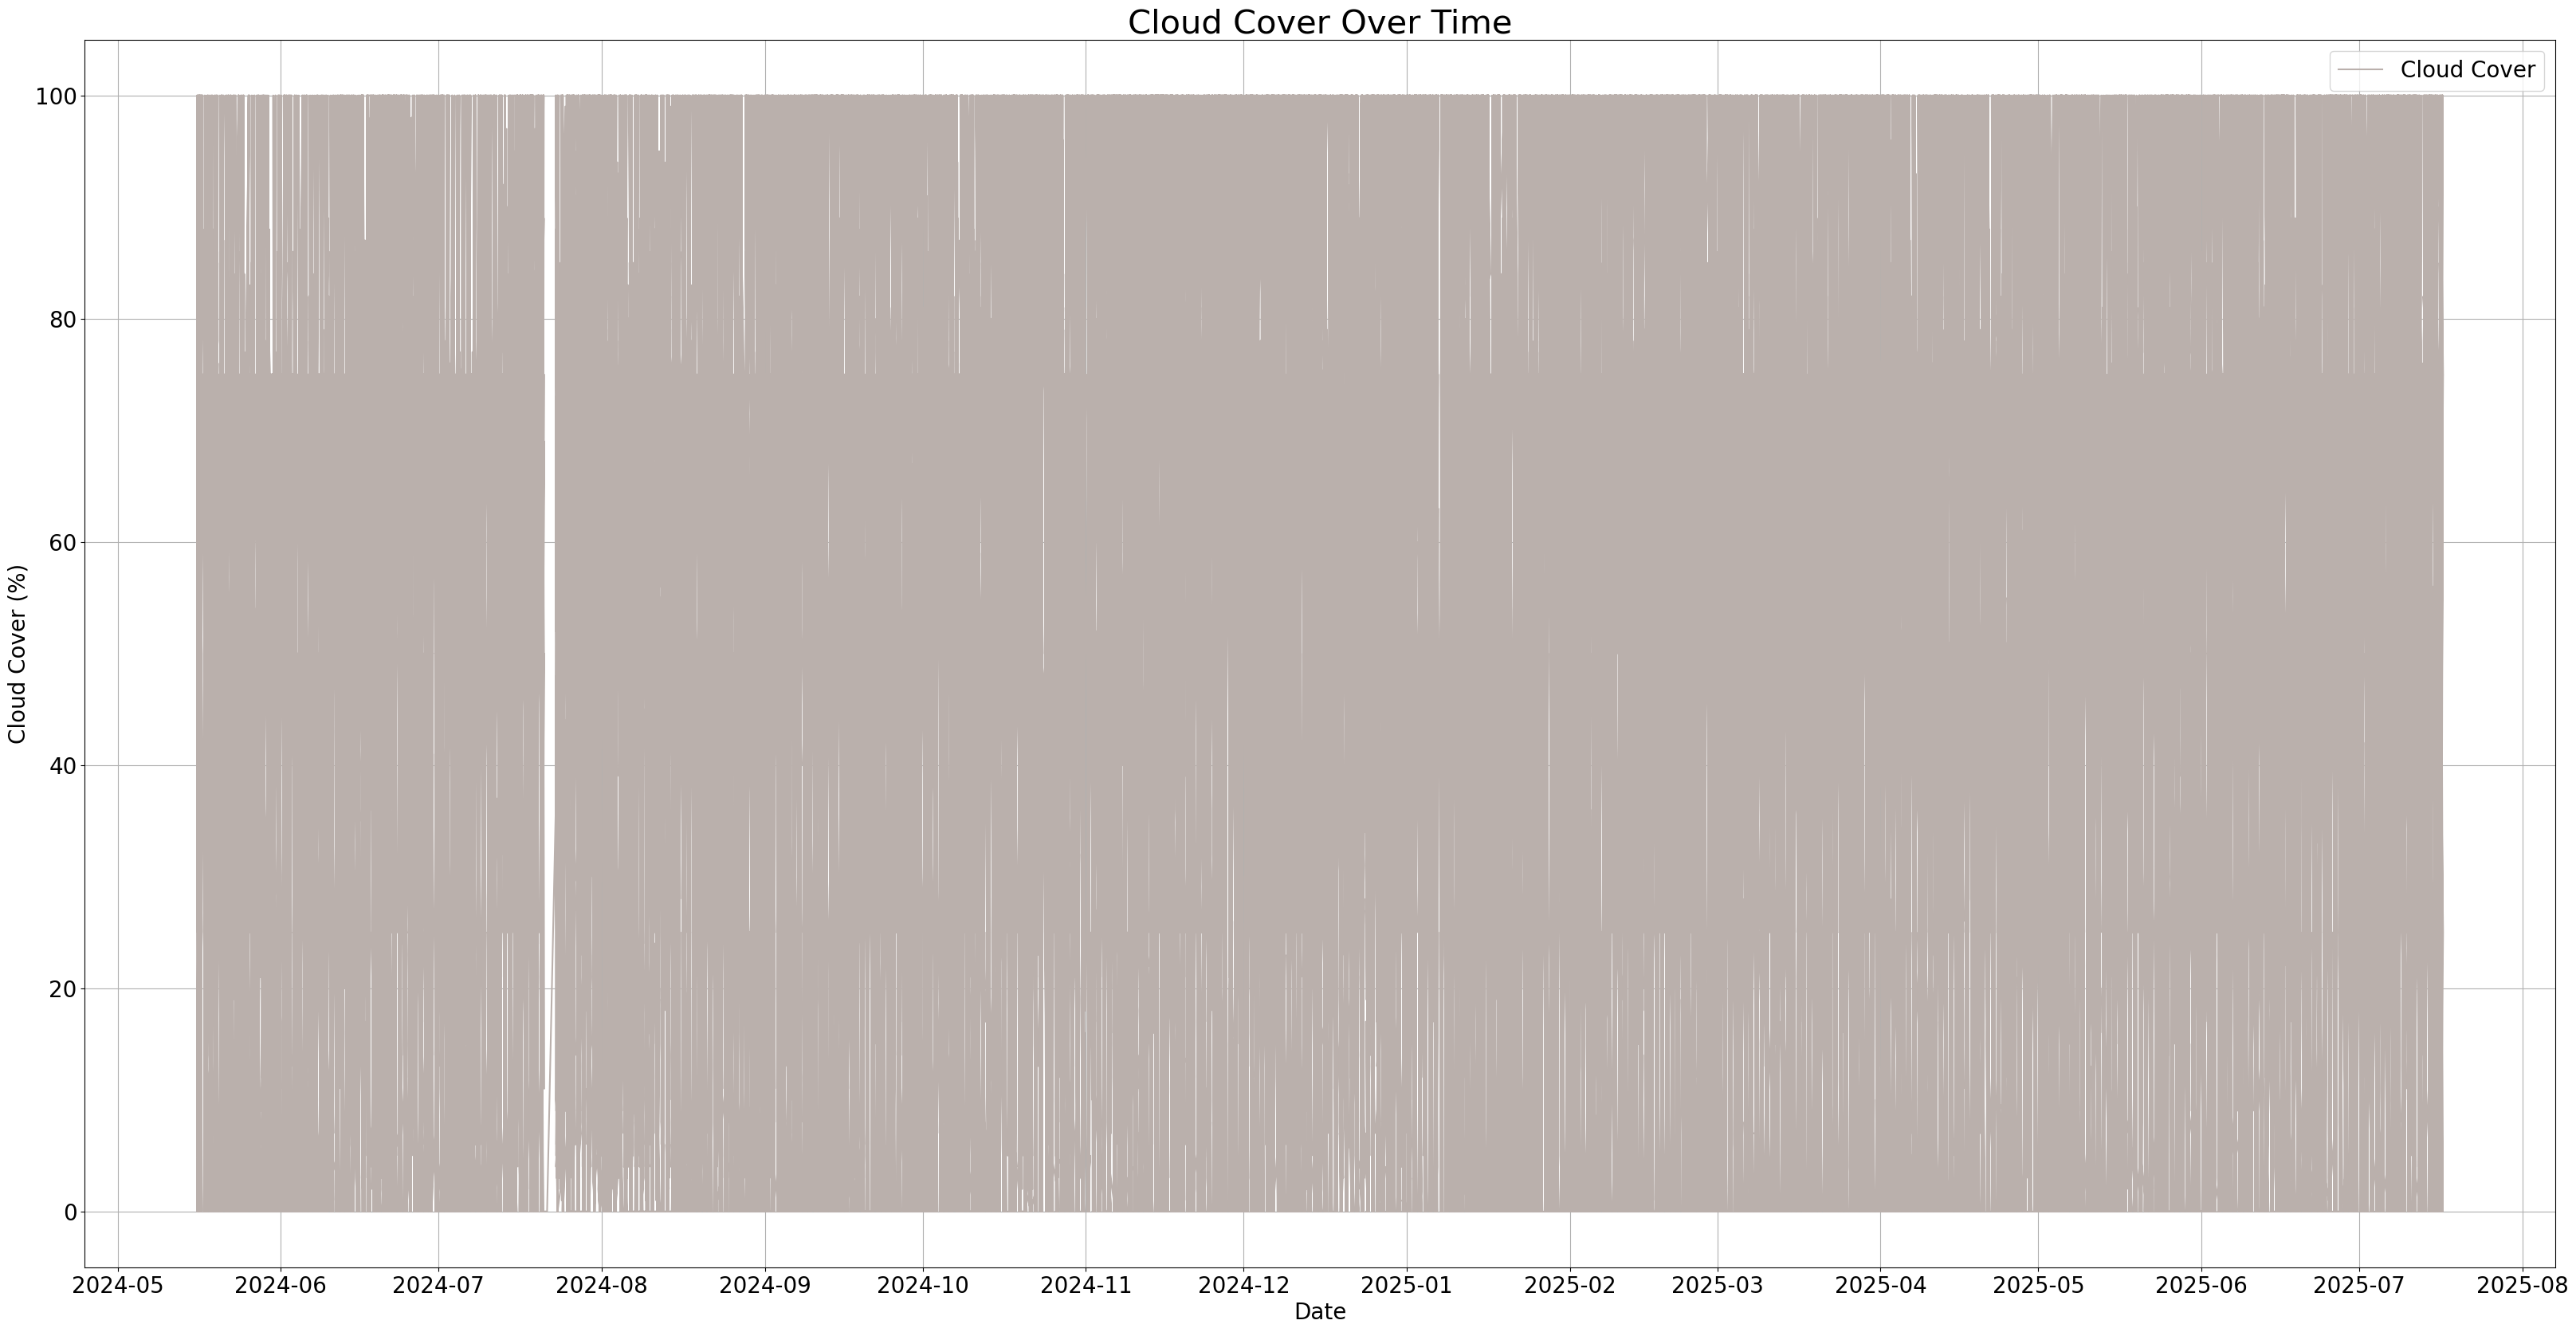

In [23]:
# Plot cloud cover over time
plt.figure(figsize=(40, 20))
plt.plot(weather_df['last_updated'], weather_df['cloud'], 
         label='Cloud Cover', color='#bab0ac')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Cloud Cover Over Time', fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Cloud Cover (%)', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid(True)
plt.show()

### Model Building

In [24]:
# Extract time features
weather_df['hour'] = weather_df['last_updated'].dt.hour
weather_df['dayofweek'] = weather_df['last_updated'].dt.dayofweek
weather_df['month'] = weather_df['last_updated'].dt.month
weather_df['dayofyear'] = weather_df['last_updated'].dt.dayofyear

# Cyclical encoding (recommended for time-based models)
weather_df['hour_sin'] = np.sin(2 * np.pi * weather_df['hour'] / 24)
weather_df['hour_cos'] = np.cos(2 * np.pi * weather_df['hour'] / 24)

In [25]:
# Scale the features
features_to_scale = ['temperature_celsius', 'humidity', 'wind_kph', 
                     'pressure_mb', 'precip_mm', 'cloud']
scaler = MinMaxScaler()
weather_scaled = weather_df.copy()
weather_scaled[features_to_scale] = scaler.fit_transform(weather_scaled[features_to_scale])

In [26]:
# Define model variables
X = weather_scaled[features_to_scale + ['hour_sin', 'hour_cos', 'dayofyear']]
y = weather_scaled['feels_like_celsius']  # normalize this if needed

In [27]:
# Split the data into training and testing sets 
# based on 'last_updated'
split_date = weather_scaled['last_updated'].quantile(0.75)
X_train = X[weather_scaled['last_updated'] <= split_date]
X_test  = X[weather_scaled['last_updated'] > split_date]
y_train = y[weather_scaled['last_updated'] <= split_date]
y_test  = y[weather_scaled['last_updated'] > split_date]

In [28]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model with metrics
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 1.2416996128608813
RMSE: 1.7325489819412985
R² Score: 0.9639108360725013


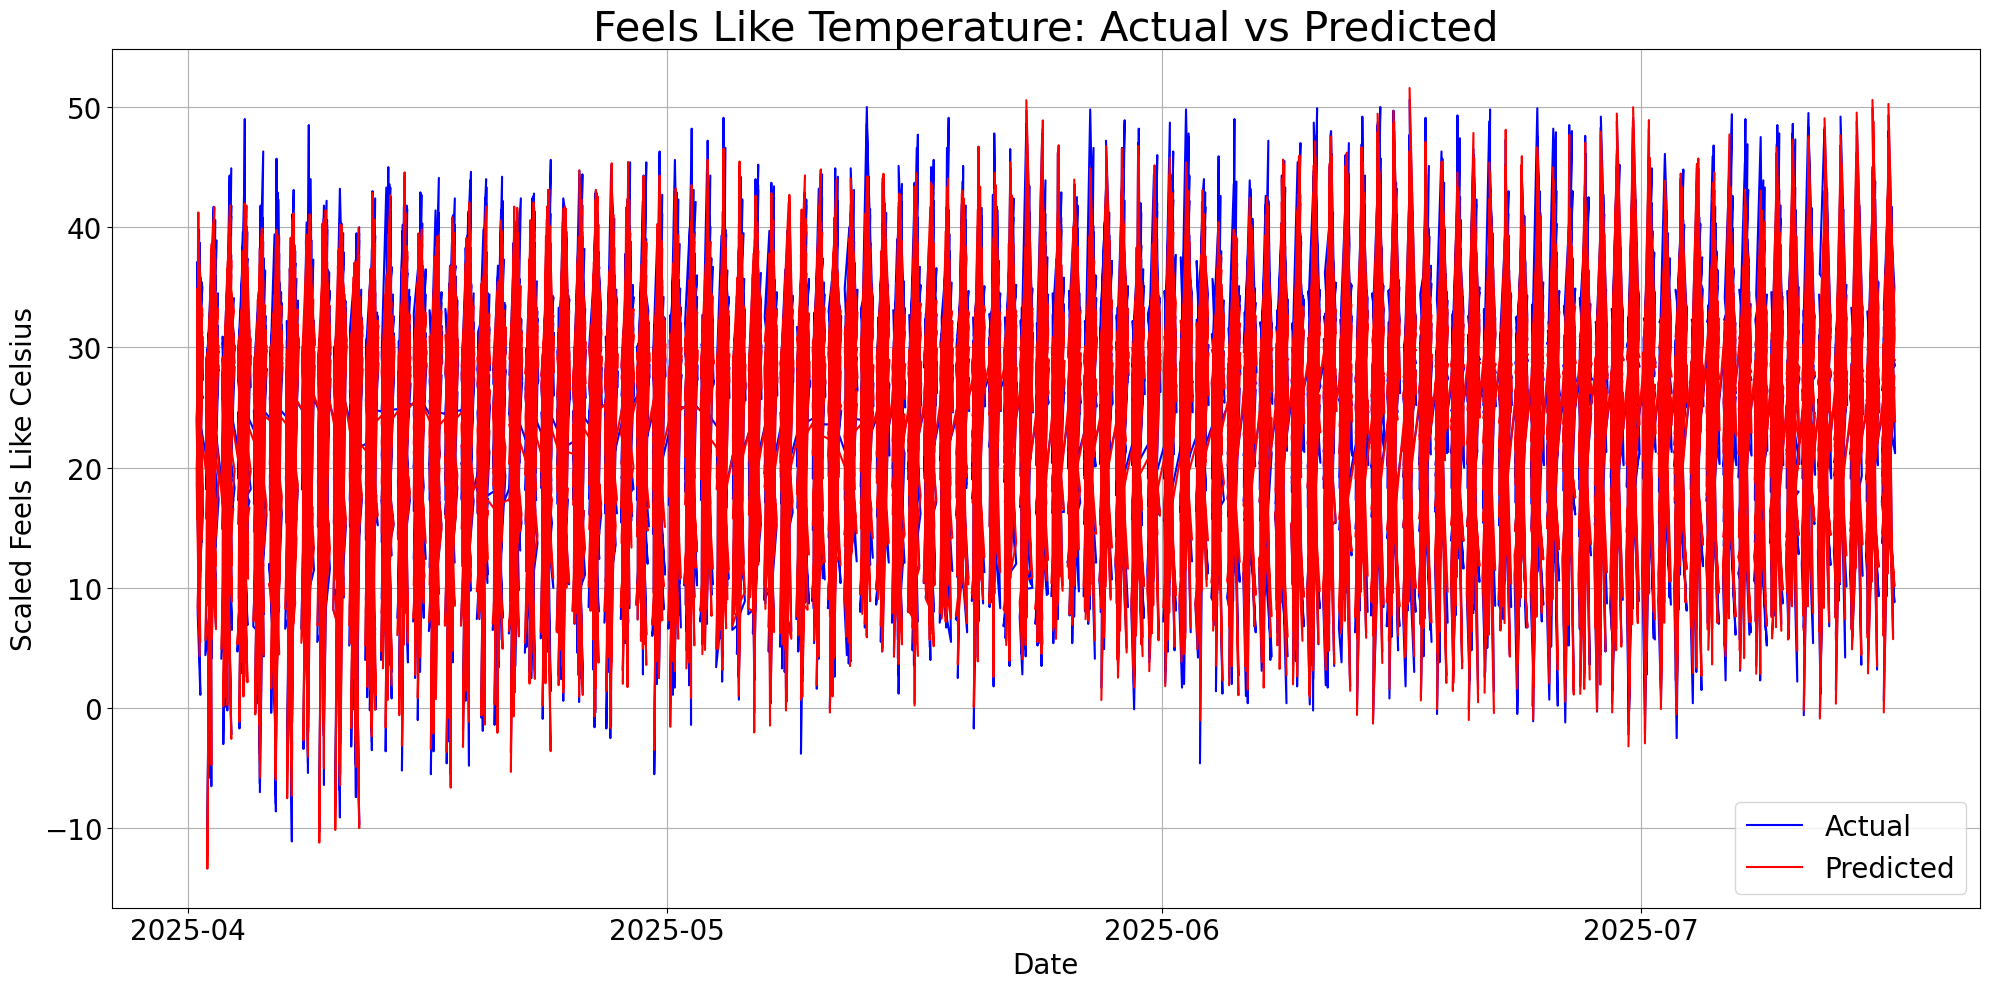

In [29]:
# Plot the results
plt.figure(figsize=(20, 10))
plt.plot(weather_scaled['last_updated'][weather_scaled['last_updated'] > split_date], y_test, label='Actual', color='blue')
plt.plot(weather_scaled['last_updated'][weather_scaled['last_updated'] > split_date], y_pred, label='Predicted', color='red')
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.title('Feels Like Temperature: Actual vs Predicted',
          fontsize=30)
plt.xlabel('Date', fontsize=20)
plt.ylabel('Scaled Feels Like Celsius', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
# Display model summary
X_with_const = sm.add_constant(X)  # add intercept term
model_sm = sm.OLS(y, X_with_const).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:     feels_like_celsius   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 3.398e+05
Date:                Wed, 16 Jul 2025   Prob (F-statistic):               0.00
Time:                        20:46:11   Log-Likelihood:            -1.6502e+05
No. Observations:               82814   AIC:                         3.301e+05
Df Residuals:                   82804   BIC:                         3.301e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -38.0375    

In [38]:
# Display the F-statistic and p-value
print("F-statistic:", model_sm.fvalue)
print("p-value:", model_sm.f_pvalue)

F-statistic: 339790.145664085
p-value: 0.0
